In [2]:
from modules.forecasting.models.sarimax import SarimaxModel
import matplotlib.pyplot as plt
from modules.forecasting.data.preprocess_coin import CoinPreprocessor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

from pathlib import Path
import modules.forecasting.models.sarimax as sarimax_pkg

import pandas as pd

model_dir = Path(sarimax_pkg.__file__).parent / "saved" / "sarimax"
model = SarimaxModel("ETH", model_dir=model_dir)
model.load()

forecast = model.forecast(steps=7, last_date=pd.Timestamp.utcnow())
print(forecast)


2025-10-01 07:12:11.105937+00:00    0.859487
2025-10-02 07:12:11.105937+00:00    0.859459
2025-10-03 07:12:11.105937+00:00    0.859467
2025-10-04 07:12:11.105937+00:00    0.859464
2025-10-05 07:12:11.105937+00:00    0.859465
2025-10-06 07:12:11.105937+00:00    0.859465
2025-10-07 07:12:11.105937+00:00    0.859465
Freq: D, Name: predicted_mean, dtype: float64


In [3]:
cp = CoinPreprocessor()
hist_df = cp.load_features_series("ETH", exchange="binance", interval="1h")  
series = hist_df["close"] 
print("history length:", len(series))

history length: 2967


In [4]:
forecast = model.forecast(steps=14, last_date=series.index[-1])
print("forecast index:", forecast.index)

forecast index: DatetimeIndex(['2025-09-30 00:00:00+00:00', '2025-10-01 00:00:00+00:00',
               '2025-10-02 00:00:00+00:00', '2025-10-03 00:00:00+00:00',
               '2025-10-04 00:00:00+00:00', '2025-10-05 00:00:00+00:00',
               '2025-10-06 00:00:00+00:00', '2025-10-07 00:00:00+00:00',
               '2025-10-08 00:00:00+00:00', '2025-10-09 00:00:00+00:00',
               '2025-10-10 00:00:00+00:00', '2025-10-11 00:00:00+00:00',
               '2025-10-12 00:00:00+00:00', '2025-10-13 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')


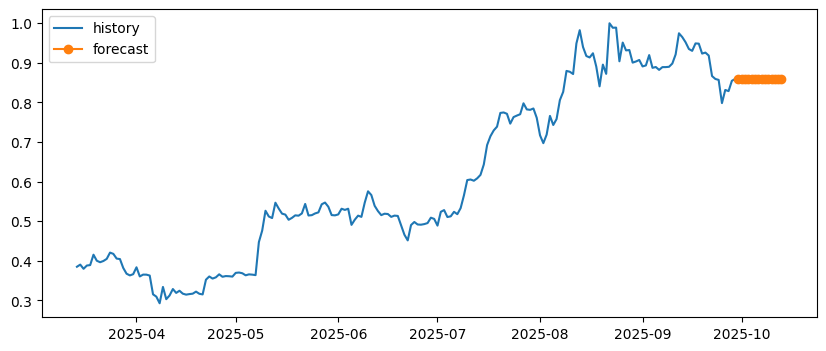

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series.tail(200), label="history")
plt.plot(forecast.index, forecast.values, marker="o", label="forecast")
plt.legend(); plt.show()

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2966
Model:               SARIMAX(1, 1, 1)   Log Likelihood                7796.257
Date:                Tue, 30 Sep 2025   AIC                         -15586.514
Time:                        12:42:12   BIC                         -15568.532
Sample:                    08-17-2017   HQIC                        -15580.042
                         - 09-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2803      0.145     -1.932      0.053      -0.565       0.004
ma.L1          0.2192      0.148      1.478      0.139      -0.071       0.510
sigma2         0.0003    3.1e-06     97.885      0.0

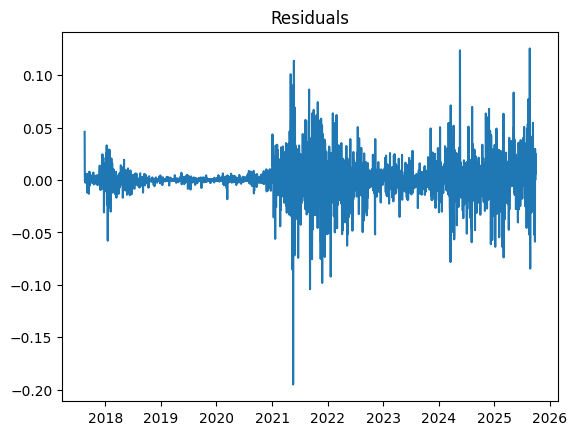

In [6]:
print(model.model_fit.summary())
resid = model.model_fit.resid
plt.figure(); plt.plot(resid); plt.title("Residuals"); plt.show()